In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 38s 3us/step


In [4]:
x_train4D = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test4D = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [5]:
x_train4D_normalize = x_train4D / 255
x_test4D_normalize = x_test4D / 255

In [6]:
y_train_onehot = np_utils.to_categorical(y_train)
y_test_onehot = np_utils.to_categorical(y_test)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

In [8]:
model = Sequential(name='CNN')

model.add(Conv2D(filters=16,
                 kernel_size=(5, 5),
                 padding='same',
                 input_shape=(28, 28, 1),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=36,
                 kernel_size=(5, 5),
                 padding='same',
                 activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))
print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1764)              0         
_______________________________________________

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [10]:
train_history = model.fit(x=x_train4D_normalize,
                          y=y_train_onehot,
                          validation_split=0.2,
                          epochs=10,
                          batch_size=300,
                          verbose=2)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 18s - loss: 0.4912 - accuracy: 0.8464 - val_loss: 0.0946 - val_accuracy: 0.9721
Epoch 2/10
 - 17s - loss: 0.1371 - accuracy: 0.9595 - val_loss: 0.0636 - val_accuracy: 0.9810
Epoch 3/10
 - 17s - loss: 0.0967 - accuracy: 0.9712 - val_loss: 0.0546 - val_accuracy: 0.9843
Epoch 4/10
 - 17s - loss: 0.0804 - accuracy: 0.9755 - val_loss: 0.0471 - val_accuracy: 0.9862
Epoch 5/10
 - 17s - loss: 0.0691 - accuracy: 0.9798 - val_loss: 0.0410 - val_accuracy: 0.9885
Epoch 6/10
 - 17s - loss: 0.0592 - accuracy: 0.9811 - val_loss: 0.0368 - val_accuracy: 0.9887
Epoch 7/10
 - 17s - loss: 0.0519 - accuracy: 0.9841 - val_loss: 0.0414 - val_accuracy: 0.9886
Epoch 8/10
 - 17s - loss: 0.0474 - accuracy: 0.9858 - val_loss: 0.0356 - val_accuracy: 0.9899
Epoch 9/10
 - 17s - loss: 0.0441 - accuracy: 0.9866 - val_loss: 0.0337 - val_accuracy: 0.9900
Epoch 10/10
 - 17s - loss: 0.0404 - accuracy: 0.9875 - val_loss: 0.0356 - val_accuracy: 0.9893


In [11]:
import matplotlib.pyplot as plt
def show_train_history(tr_history, train, valid):
    plt.plot(tr_history.history[train])
    plt.plot(tr_history.history[valid])
    plt.title('Train History')
    plt.xlabel('epoch'); plt.ylabel(train)
    plt.legend(['train', 'validation'], loc='upper left')

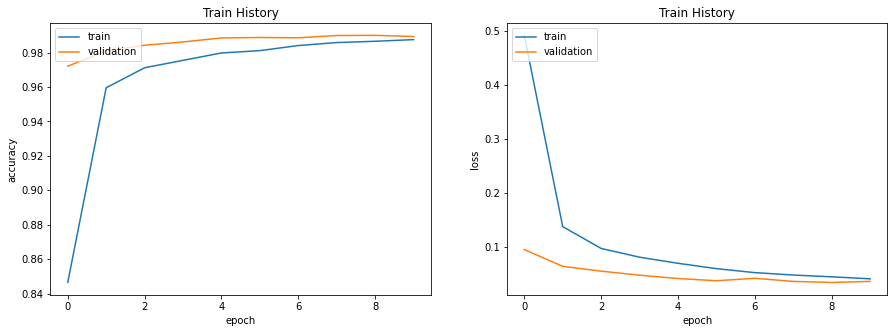

In [12]:
plt.figure(figsize=(15,5))
plt.subplot(121); show_train_history(train_history, 'accuracy', 'val_accuracy')
plt.subplot(122); show_train_history(train_history, 'loss', 'val_loss')
plt.show()

In [21]:
scores = model.evaluate(x_test4D_normalize, y_test_onehot)
print('lose =', scores[0])
print('accuracy =', scores[1])

10000/10000 [==============================] - 1s 51us/step
lose = 0.02584596445478419
accuracy = 0.9908999800682068


In [18]:
prediction = model.predict_classes(x_test4D_normalize)

In [19]:
import pandas as pd
pd.crosstab(y_test, prediction,
            rownames=['label'], colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,977,1,0,0,0,0,0,1,1,0
1,0,1133,1,0,0,0,0,1,0,0
2,1,2,1025,0,0,0,0,2,2,0
3,0,0,2,1003,0,3,0,1,1,0
4,0,0,0,0,979,0,0,0,2,1
5,2,0,0,4,0,884,1,0,0,1
6,8,2,0,0,2,1,943,0,2,0
7,0,4,6,1,0,0,0,1015,1,1
8,2,0,1,1,1,0,0,2,967,0


In [23]:
model.save('model/mdl_20220321.h5')